<a href="https://colab.research.google.com/github/ef1s/A1-SY/blob/main/%E2%80%9C%E2%80%9CHW5_Template_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC_ipynb%E2%80%9D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0.) Import the US Perminent Visas using zip extractor

In [2]:
import pandas as pd
from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [3]:
drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
import zipfile

zf = zipfile.ZipFile("/content/gdrive/MyDrive/us_perm_visas.csv.zip") 
df = pd.read_csv(zf.open('us_perm_visas.csv'))


/usr/local/lib/python3.8/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,1,2,3,4,5,6,7,10,11,16,17,20,21,22,25,26,27,28,29,30,31,32,33,34,35,36,37,39,40,41,42,43,44,45,47,48,49,50,51,52,53,55,56,57,58,59,60,61,63,64,65,66,68,69,70,71,72,73,74,77,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,100,101,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,153) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# 1.) US perm Visas csv from cycle using zip extractor


# 2.) Choose 4 features you think are important. Case_status is your target variable


In [6]:
for i in df.columns:
  print(i)

add_these_pw_job_title_9089
agent_city
agent_firm_name
agent_state
application_type
case_no
case_number
case_received_date
case_status
class_of_admission
country_of_citizenship
country_of_citzenship
decision_date
employer_address_1
employer_address_2
employer_city
employer_country
employer_decl_info_title
employer_name
employer_num_employees
employer_phone
employer_phone_ext
employer_postal_code
employer_state
employer_yr_estab
foreign_worker_info_alt_edu_experience
foreign_worker_info_birth_country
foreign_worker_info_city
foreign_worker_info_education
foreign_worker_info_education_other
foreign_worker_info_inst
foreign_worker_info_major
foreign_worker_info_postal_code
foreign_worker_info_rel_occup_exp
foreign_worker_info_req_experience
foreign_worker_info_state
foreign_worker_info_training_comp
foreign_worker_ownership_interest
foreign_worker_yr_rel_edu_completed
fw_info_alt_edu_experience
fw_info_birth_country
fw_info_education_other
fw_info_postal_code
fw_info_rel_occup_exp
fw_info

In [128]:
df_select = df[['class_of_admission','case_status','us_economic_sector',
                'foreign_worker_info_alt_edu_experience',
                'foreign_worker_info_state']]


# 3.) Clean your data for a decision tree


In [120]:
df_select_class = pd.get_dummies(df_select, 'class_of_admission')
df_select_econ = pd.get_dummies(df_select, 'us_economic_sector')
df_select_fw_alt_edu = pd.get_dummies(df_select, 'foreign_worker_info_alt_edu_experience')
df_select_fw_state = pd.get_dummies(df_select, 'foreign_worker_info_state')
x = pd.concat([df_select_class, df_select_econ, df_select_fw_alt_edu, df_select_fw_state], axis=1)
y = df_select['case_status']


# 4.) Fit and plot a decision tree of depth 3


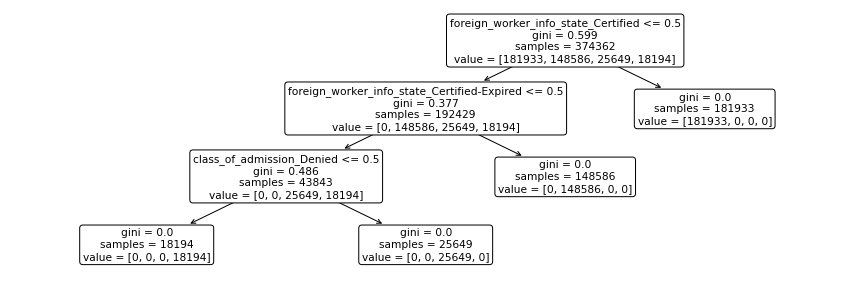

In [121]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=3)
clf.fit(x,y)
plt.figure(figsize=(15,5))
tree.plot_tree(clf,max_depth=3,rounded=True,feature_names=x.columns)
plt.show()

# 5.) Write your interpretation of the largest (by sample size) leaf node


If they are not certified, the model will stop to do prediction on them. The samples larger than the 0.5 that pass the threshold will count into certified-expired and do further prediction and repeat the process until third depth. Thus, the sample size of class of admission that is withdrawn is the largest leaf node and is 25649

# 6.) Using a for loop, make your own train-test split and determine the best max_depth for out-of sample accuracy

In [122]:
from sklearn import preprocessing
y.dropna()
le = preprocessing.LabelEncoder()
le.fit(y)
preprocessing.LabelEncoder
y = le.transform(y)
y = y.reshape(-1,1)

In [123]:
le = preprocessing.LabelEncoder()
le.fit(df_select.class_of_admission)
preprocessing.LabelEncoder
x = le.transform(df_select.class_of_admission)
x = x.reshape(-1,1)

In [126]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


outputs = []
max_depths = [1,2,3]
X_train, X_test, y_train, y_test= train_test_split(x,y,test_size=0.25,random_state=0)
for md in max_depths:
  clf = tree.DecisionTreeClassifier(max_depth=md)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(y_test)
  accuracy = accuracy_score(y_test,y_pred)
  outputs.append(accuracy)
best_depth = np.argmax(outputs) + 1
print('The best max_depth is:',best_depth)

The best max_depth is: 1
